In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Open the original CSV as it was downloaded from MYCV
original = pd.read_csv('./data/scholarly.csv')
original.head()

,ID,Scholarly & creative work type,Reporting date 1,Reporting date 2,Abstract OR Description,Acceptance date OR Date of acceptance,Addresses,Altmetric attention score,File(s) confidential,Associated authors,...,Citation count,Indexed in DOAJ,DOAJ CC Licence,Files in OpenBU RT2,OpenBU RT2 public URL,Deposited to OpenBU RT2,Item status in OpenBU RT2,Proprietary ID,Source,Canonical journal title
0,29972,Scholarly article,01/08/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,WOS:000309996500040,Web of Science,IEEE Transactions on Power Systems
1,29973,Scholarly article,01/12/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,10.1109/TMC.2011.214,Crossref,IEEE Transactions on Mobile Computing
2,30260,Scholarly article,01/01/2012,NaN,NaN,NaN,"St. Paul, Minnesota",NaN,NaN,NaN,...,NaN,No,NaN,1.0,https://hdl.handle.net/2144/18026,Yes,Live,2CC8EA0E-5D44-4C73-90A8-B996799539CB,Manual,IEEE International Conference on Robotics and ...
3,30488,Scholarly article,01/06/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,NaN,10.1109/TNET.2012.2216897,Crossref,IEEE ACM Transactions on Networking
4,30489,Scholarly article,01/08/2012,NaN,<jats:p> We consider the maximum lifetime rout...,NaN,NaN,NaN,NaN,NaN,...,NaN,Yes,CC BY,NaN,NaN,NaN,NaN,10.1155/2012/523787,Crossref,International Journal of Distributed Sensor Ne...


# Data Cleanliness Checks

The following sections are going to figure out what fields have reliable data. Some things being checked for are

1. Number of empty cells for a given column
2. How the same value may be represented in different ways ie) "Institue of Electrical and Electronics Engineering" vs. "IEEE"

In [117]:
# Grab the columns that are most likely to be of use and convert them to the correct types
columns_of_interest = {
    'Reporting date 1': 'string',
    'Scholarly & creative work type': 'string',
    'Authors OR Patent owners OR Presenters': 'string',
    'URL OR Author URL': 'string',
    'DOI': 'string',
    'Funding': 'string',
    'Published proceedings OR Journal': 'string',
    'Conference name OR Presented at OR Meeting or conference': 'string',
    'Status': 'string',
    'Publisher': 'string',
    'Publication date OR Date awarded OR Presentation date': 'datetime64',
    'Title OR Chapter title': 'string',
    'Sub types': 'string',
    'Canonical journal title': 'string'
}
data = original[columns_of_interest.keys()]
data = data.astype(columns_of_interest)
data['Reporting date 1'] = pd.to_datetime(data['Reporting date 1'], format='%d/%m/%Y')
data.head()

,Reporting date 1,Scholarly & creative work type,Authors OR Patent owners OR Presenters,URL OR Author URL,DOI,Funding,Published proceedings OR Journal,Conference name OR Presented at OR Meeting or conference,Status,Publisher,Publication date OR Date awarded OR Presentation date,Title OR Chapter title,Sub types,Canonical journal title
0,2012-08-01,Scholarly article,"Paschalidis IC, Li B, Caramanis MC",http://gateway.webofknowledge.com/gateway/Gate...,10.1109/TPWRS.2012.2183007,"NSF, NSF, DOE, ARO, ODDR&E MURI10 program",IEEE TRANSACTIONS ON POWER SYSTEMS,<NA>,Published,IEEE-INST ELECTRICAL ELECTRONICS ENGINEERS INC,2012-08-01,Demand-Side Management for Regulation Service ...,"Article, Journal",IEEE Transactions on Power Systems
1,2012-12-01,Scholarly article,"Li K, Guo D, Lin Y, Paschalidis IC",<NA>,10.1109/tmc.2011.214,<NA>,IEEE Transactions on Mobile Computing,<NA>,Published,Institute of Electrical and Electronics Engine...,2012-12-01,Position and Movement Detection of Wireless Se...,<NA>,IEEE Transactions on Mobile Computing
2,2012-01-01,Scholarly article,"Ding X-C, Wang J, Lahijanian M, Paschalidis IC...",<NA>,<NA>,<NA>,Proceedings of IEEE International Conference o...,<NA>,<NA>,<NA>,NaT,Temporal Logic Motion Control using Actor-Crit...,inproceedings,IEEE International Conference on Robotics and ...
3,2013-06-01,Scholarly article,"Moazzez-Estanjini R, Wang J, Paschalidis IC",<NA>,10.1109/tnet.2012.2216897,<NA>,IEEE/ACM Transactions on Networking,<NA>,Published,Institute of Electrical and Electronics Engine...,2013-06-01,Scheduling Mobile Nodes for Cooperative Data T...,<NA>,IEEE ACM Transactions on Networking
4,2012-08-01,Scholarly article,"Paschalidis IC, Wu R",<NA>,10.1155/2012/523787,<NA>,International Journal of Distributed Sensor Ne...,<NA>,Published,SAGE Publications,2012-08-01,Robust Maximum Lifetime Routing and Energy All...,<NA>,International Journal of Distributed Sensor Ne...


## Percentage of Data Available (All Data)

Looking at how populated each field is. The values shown below are across all data.

In [118]:
# Determine across all the data how populate the fields are
non_zero = data.count().reset_index(name='count')
non_zero['total'] = len(data.index)
non_zero['percent'] = non_zero['count'] / non_zero['total'] * 100
non_zero

,index,count,total,percent
0,Reporting date 1,416,417,99.760192
1,Scholarly & creative work type,417,417,100.000000
2,Authors OR Patent owners OR Presenters,415,417,99.520384
3,URL OR Author URL,83,417,19.904077
4,DOI,146,417,35.011990
5,Funding,44,417,10.551559
6,Published proceedings OR Journal,290,417,69.544365
7,Conference name OR Presented at OR Meeting or ...,163,417,39.088729
8,Status,208,417,49.880096
9,Publisher,105,417,25.179856


## Percentage of Data Available (Published Data)

Looking at how populated each field is. The values shown are for the scholarly work considered "published"

In [136]:
# Determine the options for the "Status"
data['Status'].value_counts(dropna=False)

<NA>                209
Published           175
Published online     22
Accepted              9
Unpublished           1
Submitted             1
Name: Status, dtype: Int64

In [137]:
published = data[data['Status'] == 'Published']
non_zero_pub = published.count().reset_index(name='count')
non_zero_pub['total'] = len(published.index)
non_zero_pub['percent'] = non_zero_pub['count'] / non_zero_pub['total'] * 100
non_zero_pub

,index,count,total,percent
0,Reporting date 1,175,175,100.000000
1,Scholarly & creative work type,175,175,100.000000
2,Authors OR Patent owners OR Presenters,173,175,98.857143
3,URL OR Author URL,59,175,33.714286
4,DOI,116,175,66.285714
5,Funding,34,175,19.428571
6,Published proceedings OR Journal,145,175,82.857143
7,Conference name OR Presented at OR Meeting or ...,86,175,49.142857
8,Status,175,175,100.000000
9,Publisher,88,175,50.285714


## Types of Work

This section explores what categories are available for the scholarly work.

In [138]:
data['Scholarly & creative work type'].value_counts(dropna=False)

Scholarly article               204
Conference paper (Published)    119
Scholarly presentation           71
Thesis / Dissertation             9
Preprint                          6
Book chapter                      5
Report                            1
Book                              1
Patent                            1
Name: Scholarly & creative work type, dtype: Int64

# Data Analysis

The following sections look to see if the desired information can be determined from the CSV. This looks at how the information looks if the information is graphed as it is presented in the CSV

In [126]:
# Grab the year of interest
year = 2012
data_year = data[data['Reporting date 1'].dt.year == year]

In [127]:
# Show the breakdown of journals
journals = data_year.groupby(['Canonical journal title'])['Canonical journal title'].count().reset_index(name='count')
journals

,Canonical journal title,count
0,Ad Hoc Networks,1
1,IEEE International Conference on Robotics and ...,1
2,IEEE Transactions on Mobile Computing,1
3,IEEE Transactions on Power Systems,1
4,International Journal of Distributed Sensor Ne...,1
5,Journal of Chemical Theory and Computation,1
6,Naval Research Logistics,1
7,Operations Research,1
8,Proceedings of the ... IEEE Conference on Deci...,3


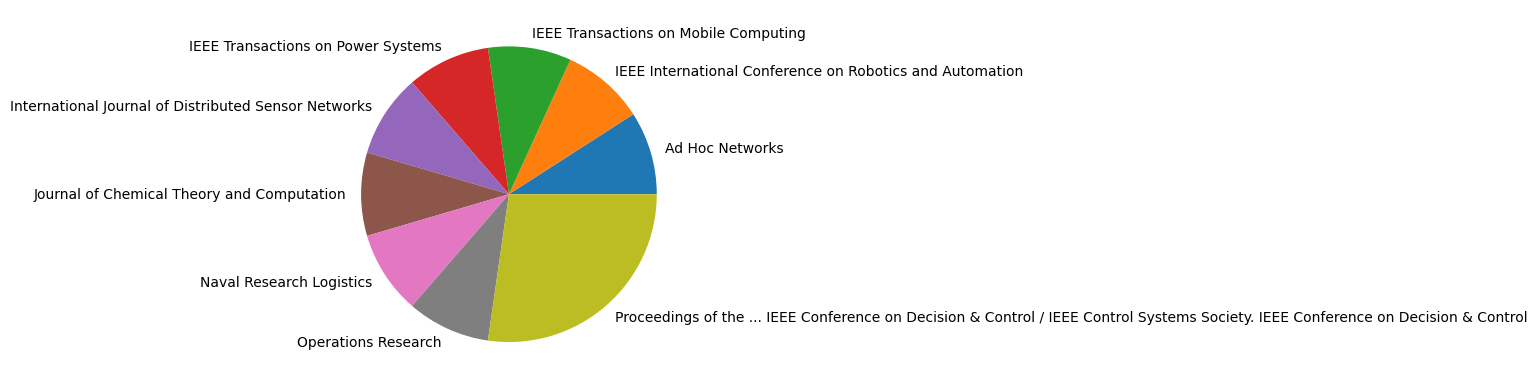

In [128]:
plt.pie(journals['count'], labels=journals['Canonical journal title'])
plt.show()

In [129]:
# Breakdown of publishers
publishers = data_year.groupby(['Publisher'])['Publisher'].count().reset_index(name='count')
publishers

,Publisher,count
0,AMER CHEMICAL SOC,1
1,Elsevier BV,1
2,IEEE-INST ELECTRICAL ELECTRONICS ENGINEERS INC,1
3,Institute of Electrical and Electronics Engine...,1
4,SAGE Publications,1
5,Wiley,1


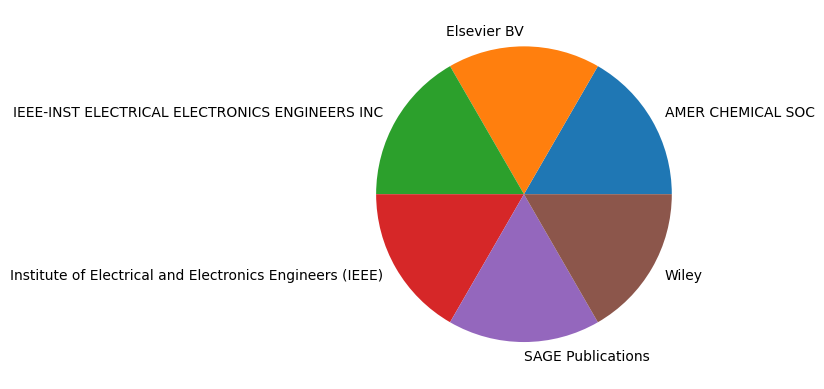

In [130]:
plt.pie(publishers['count'], labels=publishers['Publisher'])
plt.show()